### Have some fun learning about ML

Machine learning (ML) is a field of artificial intelligence focused on producing models that can learn from data, identify patterns, and make decisions with minimal human supervision. Rather than being explicitly programmed to perform a task, a machine learning model improves its performance by training on data.

The following is an example meant to introduce you to the general methodology and terms involved in ML:

In [1]:
# Import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ML Intro
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

In [3]:
def generate_data(n, noise_std, function_type="sine"):
    # function to generate example data
    np.random.seed(1)
    Z = np.random.normal(0, noise_std, n)

    if function_type == "sine":
        X = np.linspace(-10 * np.pi, 10 * np.pi, n)
        Y = X * np.sin(X) + Z
        Y_denoised = X * np.sin(X)
    elif function_type == "cubic":
        X = np.linspace(-1, 1, n)
        Y = 3*(X**3) - 2*(X**2) + 8*X + Z
        Y_denoised = 3*(X**3) - 2*(X**2) + 8*X
    elif function_type == "linear":
        X = np.linspace(-5, 5, n)
        Y = 4*X + 2 + Z
        Y_denoised = 4*X + 2
    else:
        raise ValueError("Unsupported function type.")
    
    return X, Y, Y_denoised

def plot_data(n, noise_std, function_type):
    # function to plot data
    X, Y, Y_denoised = generate_data(n, noise_std, function_type)
    plt.figure(figsize=(10, 5))
    plt.scatter(X, Y, label="Noisy data", alpha=0.6, color="red")
    plt.plot(X, Y_denoised, label="Underlying function", color='black')
    plt.title(f"{function_type.capitalize()} function with n={n}, noise std={noise_std}")
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.legend()
    plt.grid(True)
    plt.show()
    return X, Y, Y_denoised

Choose function type (linear, cubic, sine):  linear


We refer to the input variable(s) as our feature vector X,
And our output we'd like to learn to predict is called the target Y.
Giving more data to the model might make it easier for it to learn the task:


Enter number of samples (e.g. 200):  1000


And making the data noisier will introduce some difficulty:


Enter noise standard deviation (e.g. 5):  10


Can an ML model learn to master this regression task?
Generating plot...


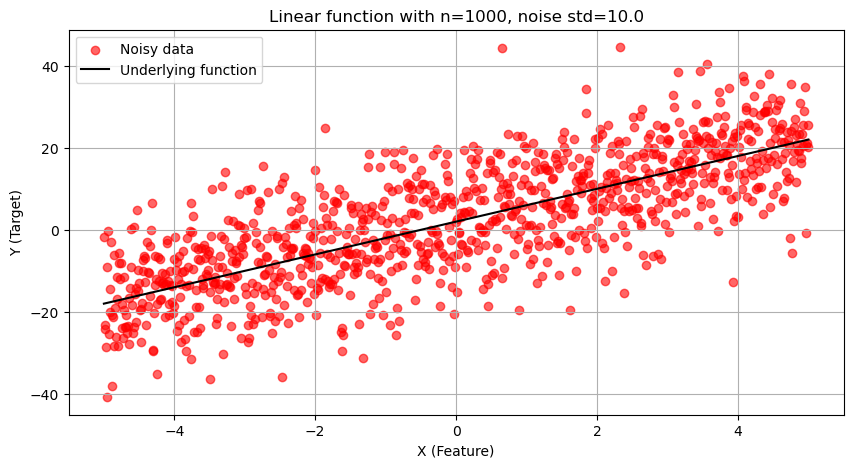

In [5]:
function_type = input("Choose function type (linear, cubic, sine): ").strip().lower()
print("We refer to the input variable(s) as our feature vector X,")
time.sleep(1)
print("And our output we'd like to learn to predict is called the target Y.")
time.sleep(1)
print("Giving more data to the model might make it easier for it to learn the task:")
time.sleep(1)
n = int(input("Enter number of samples (e.g. 200): "))
time.sleep(1)
print("And making the data noisier will introduce some difficulty:")
time.sleep(1)
noise_std = float(input("Enter noise standard deviation (e.g. 5): "))
time.sleep(1)
print("Can an ML model learn to master this regression task?")
print("Generating plot...")
time.sleep(1)
X, Y, Y_denoised = plot_data(n, noise_std, function_type)

In ML, we want to train the model on one portion of the available data and test it on another to avoid feeding it a task it has 'memorized' in a manner of speaking. We can also make the testing data more challenging by taking it from a range of the features unseen by the model.

Here, we'll use a portion of the above data for training and another for *validation* (evaluating the predivctive power of the model).

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

There are a variety of different machine learning *architectures* which you may have heard of or used before: linear regressor, singular value decomposition (SVD), decision trees, random forest, neural networks, convolutional neural networks, graph neural networks, variational autoencoders (VAEs), ... the list goes on.

The particular architecture chosen depends on the task you'd like to accomplish.

Let's see what various different model architectures can do for our basic ML task!

In [9]:
print("Available models: ")
print("     - linear regressor: 'linear'")
time.sleep(1)
print("     - random forest: 'forest'")
print("[A random forest is an ensemble of binary decision trees that vote on predictions,")
print("often averaging many independently trained trees to ensure convergence.]")
time.sleep(1)
print("     - neural network: 'mlp'")
print("[A neural network (here a multi-layer perceptron, MLP) consists of layers of interconnected nodes")
print("that apply linear and nonlinear transformations to inputs, enabling it to learn complex patterns.]")
time.sleep(2)
model_choice = input("Enter model type: ").strip().lower()

if model_choice == "linear":
    title = "Linear Regressor"
    model = LinearRegression()
elif model_choice == "forest":
    title = "Random Forest"
    model = RandomForestRegressor(n_estimators=100, random_state=6)
elif model_choice == "mlp":
    title = "Neural Network"
    model = MLPRegressor(hidden_layer_sizes=(256,), max_iter=1500, random_state=6)
else:
    raise ValueError("Unsupported model type.")

model.fit(X_train, Y_train)
print(f"Training {model_choice} model...")

Available models: 
     - linear regressor: 'linear'
     - random forest: 'forest'
[A random forest is an ensemble of binary decision trees that vote on predictions,
often averaging many independently trained trees to ensure convergence.]
     - neural network: 'mlp'
[A neural network (here a multi-layer perceptron, MLP) consists of layers of interconnected nodes
that apply linear and nonlinear transformations to inputs, enabling it to learn complex patterns.]


Enter model type:  mlp


Training mlp model...


Now that we have trained our chosen model, we can ask it to predict the behavior of our function Y(X) (plus noise). Let's see how it does, using a common metric, root mean squared error (RMSE).

In this context we refer to RMSE as our *loss function* because it quantifies the discrepancy between the model's predictions and the targets. Of course, the goal for a machine learning task is to minimize the loss function on the validation set. The model trains itself by minimizing the loss function on the training set, however, using an iterative process of updating its parameters.

In [11]:
Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE on validation data: {rmse:.2f}")

RMSE on validation data: 9.61


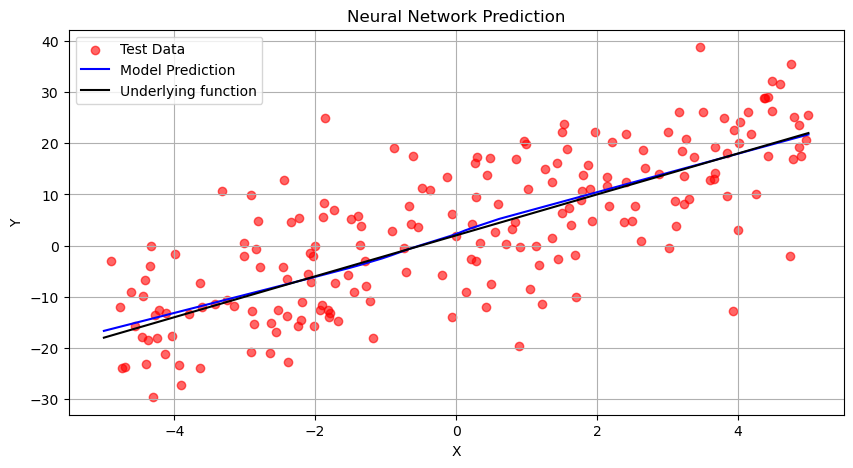

In [13]:
X_full = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
Y_full_pred = model.predict(X_full)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, Y_test, label="Test Data", color='red', alpha=0.6)
plt.plot(X_full, Y_full_pred, label="Model Prediction", color='blue')
plt.title(f"{title.replace('_', ' ').title()} Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, Y_denoised, label="Underlying function", color='black')
plt.legend()
plt.grid(True)
plt.show()

If you play around with different models and underlying functions, you might notice certain model architectures are better suited to different tasks.

You may also see that the RMSE has a lower bound determined by the standard deviation of the noise which you select: more noise means a higher RMSE, even if your model "knows" the underlying function quite well.